In [2]:
%matplotlib ipympl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import matplotlib.colors as mcolors
import os
datapick = 2
figsize = (10, 7)
# Initialize the filename variable
filename = ''

if datapick == 1:
    filename = '/tmp/icpy/icpy/histogram_data_10000.npz'  # 10000 x 10000
elif datapick == 2:
    filename = '/tmp/icpy/icpy/histogram_data_100_bins.npz'  # 100 bins
elif datapick == 3:
    filename = '/tmp/icpy/icpy/histogram_data_162_bins.npz'  # 162 bins
elif datapick == 4:
    filename = '/tmp/icpy/icpy/histogram_data_162x35y_bins.npz'  # 162 x 35 bins
elif datapick == 5:
    filename = '/tmp/icpy/icpy/histogram_data_10000_bins_max35ts.npz'  # 10000 x 10000 bins max 35 ts 
elif datapick == 6:
    filename = '/tmp/icpy/icpy/histogram_data_1000_bins.npz'  # 9720 x 3500 bins
else: # choose 0 
    filename = '/tmp/icpy/icpy/histogram_data_9720x3500y_bins.npz'  # 9720 x 3500 bins

# Load the data from the determined filename
data = np.load(filename)

# Print the datapick and the filename
print(f"Data pick = {datapick}")
print(f"Loading file: {filename}")

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Verify the data
print(histogram_2d)
print(x_edges)
print(y_edges)
print(f"Histogram 2D Shape: {histogram_2d.shape}")
print(f"X edges (Declination): {x_edges[0]} to {x_edges[-1]}")
print(f"Y edges (Hat_TS): {y_edges[0]} to {y_edges[-1]}")
print(f"Histogram Data Sum: {np.sum(histogram_2d)}")

# Print the contents of the file
print("Contents of the .npz file:")
for key in data.files:
    print(f"Key: {key}")
    print(f"Shape: {data[key].shape}")
    print(f"Data:\n{data[key]}\n")

# Define the directory where you want to save the plots
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# def save_plot(fig, ax):
#     """
#     Save the given figure to the specified directory, using the title as the filename.

#     Parameters:
#     - fig: The matplotlib figure object to be saved.
#     - ax: The matplotlib axes object where the plot is drawn.
#     """
#     # Extract the title from the plot
#     title = ax.get_title()
    
#     # Create a valid filename from the title
#     # Replace spaces and special characters with underscores
#     filename = title.replace(' ', '_').replace('/', '_') + '.png'
    
#     # Full path for the file
#     filepath = os.path.join(save_dir, filename)
    
#     # Save the plot
#     fig.savefig(filepath)
#     print(f"Plot saved as {filepath}")

# Define specific declination values (in degrees)
declinations = [42]
declinations_str = ', '.join(map(str, declinations))
print("====================================")
print(f'Declination to be plotted: {declinations_str}')
print("====================================")

Data pick = 2
Loading file: /tmp/icpy/icpy/histogram_data_100_bins.npz
[[ 513179.   33255.   21996. ...       0.       0.       0.]
 [ 565820.   50695.   32521. ...       0.       0.       0.]
 [ 661878.   55194.   34905. ...       0.       0.       0.]
 ...
 [1702784.  132876.   79456. ...       0.       0.       0.]
 [1658337.  142103.   86074. ...       0.       0.       0.]
 [1768517.  114180.   69474. ...       0.       0.       0.]]
[-81.   -79.38 -77.76 -76.14 -74.52 -72.9  -71.28 -69.66 -68.04 -66.42
 -64.8  -63.18 -61.56 -59.94 -58.32 -56.7  -55.08 -53.46 -51.84 -50.22
 -48.6  -46.98 -45.36 -43.74 -42.12 -40.5  -38.88 -37.26 -35.64 -34.02
 -32.4  -30.78 -29.16 -27.54 -25.92 -24.3  -22.68 -21.06 -19.44 -17.82
 -16.2  -14.58 -12.96 -11.34  -9.72  -8.1   -6.48  -4.86  -3.24  -1.62
   0.     1.62   3.24   4.86   6.48   8.1    9.72  11.34  12.96  14.58
  16.2   17.82  19.44  21.06  22.68  24.3   25.92  27.54  29.16  30.78
  32.4   34.02  35.64  37.26  38.88  40.5   42.12  43.74  45

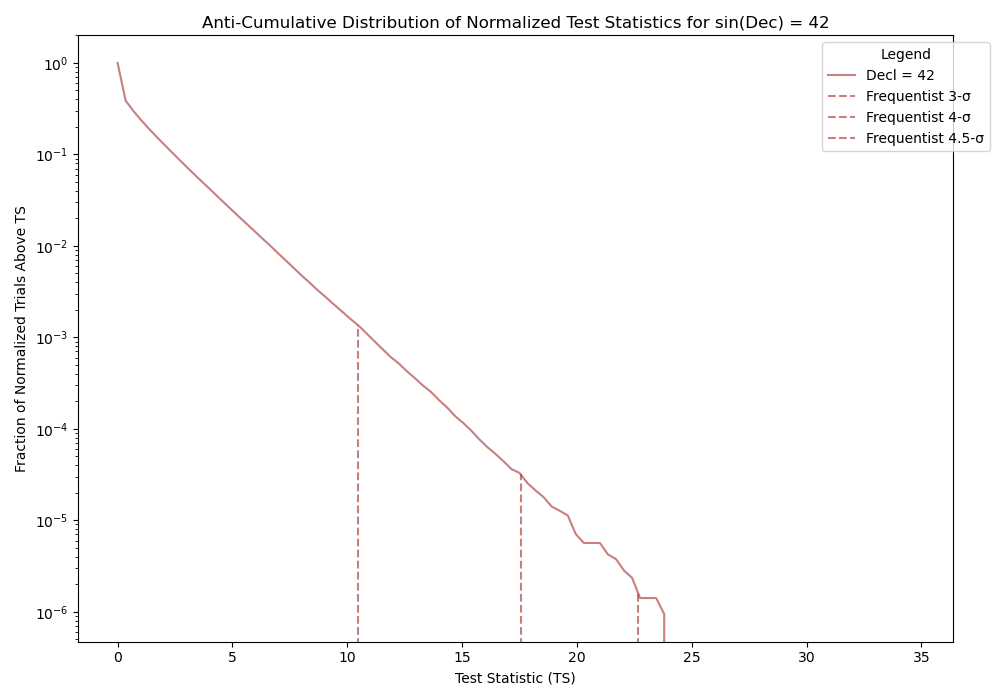

Frequentist critical value at 3-sigma: 10.479443725961538
Frequentist critical value at 4-sigma: 17.55913912361328
Frequentist critical value at 4.5-sigma: 22.64329123891017


In [3]:
##~~~~~~~~~##======================##
##~Working~##  Unfitted raw Dist.  ##
##~~~~~~~~~##======================##

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define specific declination values (in degrees)
# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]


# Initialize plot
fig2, ax2 = plt.subplots(figsize=(10, 7))

# Plot the anti-cumulative distribution
for decl in declinations:
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        
        frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist, 0.0027/2, y_edges[:-1])

        # Calculate the number of TS values above the 3-sigma threshold
        N_2 = np.sum(histogram_2d[idx, :] >= frequentist_critical_value)
        N = total_counts
        
        # Plot the anti-cumulative distribution and store the line object
        line, = ax2.plot(y_edges[:-1], fraction_above_ts_norm, color='brown', label=f'Decl = {decl}', alpha=0.6)
        
        # Extract the data that was actually plotted
        x_data_plotted_ts = line.get_xdata()
        y_data_plotted_ts = line.get_ydata()
        
        # Filter out any data that wasn't plotted (e.g., NaNs, zeros)
        valid_data_mask = y_data_plotted_ts > 0
        x_data_valid = x_data_plotted_ts[valid_data_mask]
        y_data_valid = y_data_plotted_ts[valid_data_mask]     
        frequentist_critical_values = {}
        # Plot the Frequentist and Fitted critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, y_edges[:-1])
            frequentist_critical_values[sigma] = frequentist_critical_value
            # Plot the frequentist critical value
            y_critical_frequentist= np.interp(frequentist_critical_value, x_data_valid, y_data_valid)
            ax2.plot([frequentist_critical_value, frequentist_critical_value], [0, y_critical_frequentist], color='brown', linestyle='--', alpha=0.6, label=f'Frequentist {sigma}-σ')

# Finalize the plot
ax2.set_xlabel('Test Statistic (TS)')
ax2.set_ylabel('Fraction of Normalized Trials Above TS')
ax2.set_title(f'Anti-Cumulative Distribution of Normalized Test Statistics for sin(Dec) = {declinations_str}')
ax2.set_yscale('log')
#ax.set_xscale('log')
ax2.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax2.grid(False)
plt.tight_layout()

# Display the plot
plt.show()
# Print the frequentist critical values for all sigma levels
for sigma, critical_value in frequentist_critical_values.items():
    print(f"Frequentist critical value at {sigma}-sigma: {critical_value}")
# # Print the data points     
# for i, ts in enumerate(y_edges[:-1]):
#     print(f"TS: {ts:.2f}, Fraction of Trials Above TS: {fraction_above_ts_norm[i]:.6f}")

# Assuming you are at the point where you calculate the frequentist critical value

# print("Original Script Data:")
# print("x_data_valid:", x_data_valid)
# print("y_data_valid:", y_data_valid)

# cumulative_sum_norm_hist = np.cumsum(y_data_valid[::-1])[::-1]
# print("cumulative_sum_norm_hist:", cumulative_sum_norm_hist)


P-value for TS = 9: 2.8470e-03
P-value for TS = 16: 6.6963e-05
P-value for TS = 20: 6.8576e-06
P-value for TS = 25: 0.0000e+00


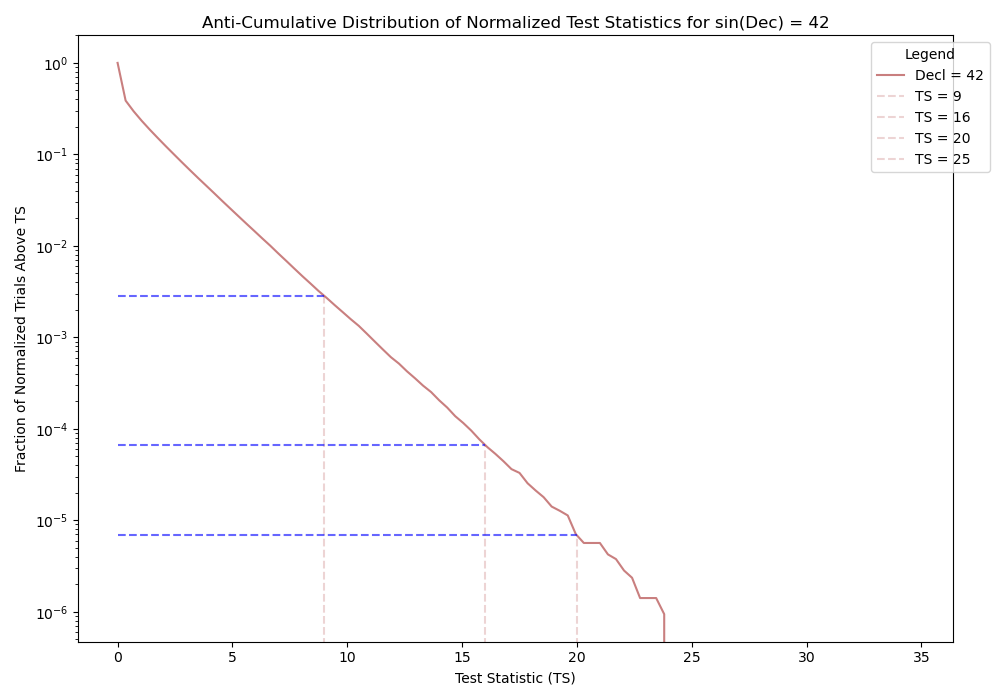

P-value for TS = 9: 2.8470e-03
P-value for TS = 16: 6.6963e-05
P-value for TS = 20: 6.8576e-06
P-value for TS = 25: 0.0000e+00


In [4]:
##~~~~~~~~~##======================##
##~Testing~##  P value raw Dist.   ##
##~~~~~~~~~##======================##

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

def find_critical_p_value(cumulative_distribution, ts_value, y_edges):
    # Check if the TS value is within the range of y_edges
    if ts_value < y_edges[0] or ts_value > y_edges[-1]:
        raise ValueError("TS value is out of the range of y_edges.")

    # Find the index where the TS value would be inserted in y_edges to maintain order
    critical_index = np.searchsorted(y_edges, ts_value, side='left')

    # Edge cases: if ts_value is exactly on the boundaries of y_edges
    if critical_index == len(y_edges):
        return 0.0  # If TS is larger than the largest y_edge
    elif critical_index == 0:
        return 1.0  # If TS is smaller than the smallest y_edge

    # Get the cumulative distribution values at the surrounding indices
    y0, y1 = y_edges[critical_index - 1], y_edges[critical_index]
    p0, p1 = cumulative_distribution[critical_index - 1], cumulative_distribution[critical_index]

    # Linear interpolation to find the p-value at the given TS value
    slope = (p1 - p0) / (y1 - y0)
    p_value = p0 + slope * (ts_value - y0)

    # Normalize the p-value by dividing by the total trials to get the fraction
    total_trials = cumulative_distribution[0]
    p_value = p_value / total_trials

    return p_value

# Define specific declination values (in degrees)
# Find the indices for the specified declinations

indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Initialize a new plot for P-value distribution
fig3, ax3 = plt.subplots(figsize=(10, 7))

for decl in declinations:
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm       
        mu_threshold = 0.5
        
        line, = ax3.plot(y_edges[:-1], fraction_above_ts_norm, color='brown', label=f'Decl = {decl}', alpha=0.6)
        
        x_data_plotted_p = line.get_xdata()
        y_data_plotted_p = line.get_ydata()
        
        valid_data_mask = y_data_plotted_p > 0
        x_data_valid = x_data_plotted_p[valid_data_mask]
        y_data_valid = y_data_plotted_p[valid_data_mask]     
        
        ts_values = [9, 16, 20, 25]
        for ts_value in ts_values:
            p_value = find_critical_p_value(cumulative_sum_norm_hist, ts_value, y_edges[:-1])
            ax3.plot([ts_value, ts_value], [0, p_value], color='brown', linestyle='--', alpha=0.2, label=f'TS = {ts_value}')
            print(f"P-value for TS = {ts_value}: {p_value:.4e}")
            ax3.plot([y_edges[0], ts_value], [p_value, p_value], color='blue', linestyle='--', alpha=0.6)
ax3.set_xlabel('Test Statistic (TS)')
ax3.set_ylabel('Fraction of Normalized Trials Above TS')
ax3.set_title(f'Anti-Cumulative Distribution of Normalized Test Statistics for sin(Dec) = {declinations_str}')
ax3.set_yscale('log')
ax3.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax3.grid(False)
plt.tight_layout()
plt.show()

for ts_value in ts_values:
    p_value = find_critical_p_value(cumulative_sum_norm_hist, ts_value, y_edges[:-1])
    print(f"P-value for TS = {ts_value}: {p_value:.4e}")


NameError: name 'chi2_df' is not defined

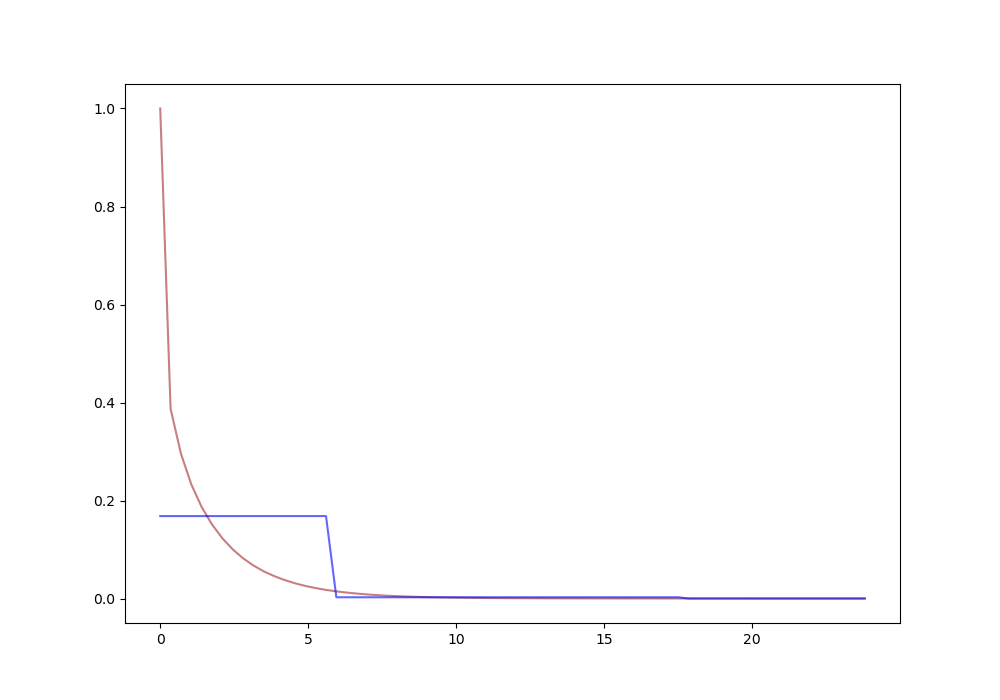

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.ndimage import gaussian_filter1d

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value
# Chi-square distribution function with 2 degrees of freedom
def chi_square_func(x, df):
    return chi2.pdf(x, df)
# Define specific declination values (in degrees)
declinations = [42]
declinations_str = ', '.join(map(str, declinations))
# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the anti-cumulative distributions and fit the chi-square model
for decl in declinations:
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm 
        #================================#
        #======== Thresholding ==========#
        #================================#
        # Apply a global mask to exclude zeros or negative values
        positive_data_mask = fraction_above_ts_norm > 0
        positive_x_data = y_edges[:-1][valid_data_mask] 
        positive_y_data = fraction_above_ts_norm[valid_data_mask]  

        # Apply a threshold to the valid data (Mu thresholding)
        mu_threshold = 0.0  # This value may need adjustment based on your data
        thresholded_x_data = positive_x_data[positive_x_data >= mu_threshold] 
        thresholded_y_data = positive_y_data[positive_x_data >= mu_threshold]
        
        #================================#
        #========== Smoothing ===========#
        #================================#
        # Continue with your smoothing and fitting process
        n = len(thresholded_y_data)
        first_25_end = n // 4
        middle_50_end = 3 * n // 4
        
        # Define sigma values with smoother transitions
        sigma_first_25 = 40
        sigma_middle_50 = 80
        sigma_last_25 = 120
        
        # Apply Gaussian smoothing to each segment
        smoothed_y_first_25 = gaussian_filter1d(thresholded_y_data[:first_25_end], sigma=sigma_first_25)
        smoothed_y_middle_50 = gaussian_filter1d(thresholded_y_data[first_25_end:middle_50_end], sigma=sigma_middle_50)
        smoothed_y_last_25 = gaussian_filter1d(thresholded_y_data[middle_50_end:], sigma=sigma_last_25)
        
        # Combine the smoothed sections
        smoothed_y_data = np.concatenate([smoothed_y_first_25, smoothed_y_middle_50, smoothed_y_last_25])

        # Combine the smoothed sections
        smoothed_y_data = np.concatenate([smoothed_y_first_25, smoothed_y_middle_50, smoothed_y_last_25])
        #================================#
        #========= Chi Square ===========#
        #================================#
        # Fit the smoothed data to a chi-square distribution
        popt, pcov = curve_fit(chi_square_func, thresholded_x_data, smoothed_y_data, p0=[2])
        fitted_df = popt[0]
        fitted_y_data = chi2.pdf(thresholded_x_data, fitted_df)
        
        # Plot the frequentist anti-cumulative distribution
        line, = ax.plot(positive_x_data, positive_y_data, color='brown', label=f'Decl = {decl} (Raw)', alpha=0.6)
        
        # Plot the smoothed anti-cumulative distribution
        ax.plot(thresholded_x_data, smoothed_y_data, color='blue', label=f'Decl = {decl} (Smoothed)', alpha=0.6)
        
        # Plot the chi-square fit
        ax.plot(thresholded_x_data, fitted_y_data, color='green', linestyle='--', label=f'Chi-Square Fit (df={chi2_df:.2f})')
        
        # Re-use the valid data mask for finding critical values
        frequentist_critical_values = {}
        
        # Plot the Frequentist critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist[valid_data_mask], p_value, valid_y_edges)
            frequentist_critical_values[sigma] = frequentist_critical_value
            
            # Plot the frequentist critical value
            y_critical_frequentist = np.interp(frequentist_critical_value, valid_y_edges, valid_fraction_above_ts_norm)
            ax.plot([frequentist_critical_value, frequentist_critical_value], [0, y_critical_frequentist], color='brown', linestyle='--', alpha=0.6, label=f'Frequentist {sigma}-σ')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title(f'Anti-Cumulative Distribution of Normalized Test Statistics for sin(Dec) = {declinations_str}')
ax.set_yscale('log')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

# Print the frequentist critical values for all sigma levels
for sigma, critical_value in frequentist_critical_values.items():
    print(f"Frequentist critical value at {sigma}-sigma: {critical_value}")   

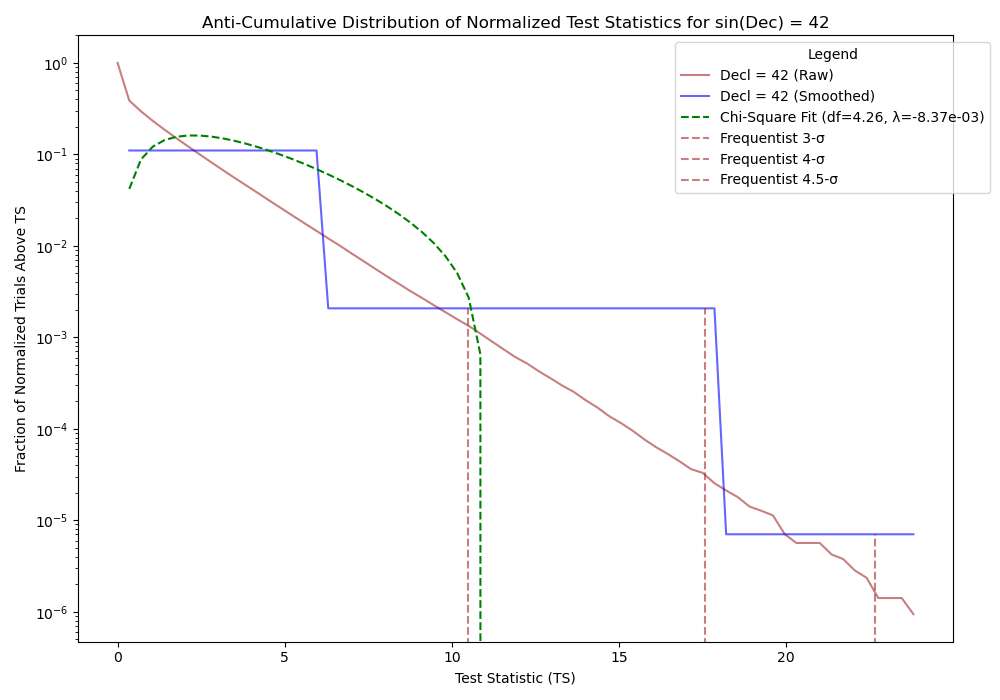

Frequentist critical value at 3-sigma: 10.479443725961538
Frequentist critical value at 4-sigma: 17.55913912361328
Frequentist critical value at 4.5-sigma: 22.64329123891017
KS Statistic: 0.5720538727904407
P-Value: 1.3800964884039845e-21


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Chi-square distribution function with regularization targeting the bottom 15% of TS values
def regularized_chi_square(x, df, lambda_reg, bottom_cutoff):
    chi_square_pdf = chi2.pdf(x, df)
    regularization = lambda_reg * np.sum((x <= bottom_cutoff) * chi_square_pdf)
    return chi_square_pdf + regularization
# Define specific declination values (in degrees)
declinations = [42]
declinations_str = ', '.join(map(str, declinations))

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the anti-cumulative distributions and fit the chi-square model
for decl in declinations:
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm 
        #================================#
        #======== Thresholding ==========#
        #================================#
        # Apply a global mask to exclude zeros or negative values
        positive_data_mask = fraction_above_ts_norm > 0
        positive_x_data = y_edges[:-1][positive_data_mask] 
        positive_y_data = fraction_above_ts_norm[positive_data_mask]  

        # Apply a threshold to the valid data (Mu thresholding)
        mu_threshold = 0.1  # This value may need adjustment based on your data
        thresholded_x_data = positive_x_data[positive_x_data >= mu_threshold] 
        thresholded_y_data = positive_y_data[positive_x_data >= mu_threshold]
        
        #================================#
        #========== Smoothing ===========#
        #================================#
        # Continue with your smoothing and fitting process
        n = len(thresholded_y_data)
        first_25_end = n // 4
        middle_50_end = 3 * n // 4
        
        # Define sigma values with smoother transitions
        sigma_first_25 = 100
        sigma_middle_50 = 140
        sigma_last_25 = 180
        
        # Apply Gaussian smoothing to each segment
        smoothed_y_first_25 = gaussian_filter1d(thresholded_y_data[:first_25_end], sigma=sigma_first_25)
        smoothed_y_middle_50 = gaussian_filter1d(thresholded_y_data[first_25_end:middle_50_end], sigma=sigma_middle_50)
        smoothed_y_last_25 = gaussian_filter1d(thresholded_y_data[middle_50_end:], sigma=sigma_last_25)
        
        # Combine the smoothed sections
        smoothed_y_data = np.concatenate([smoothed_y_first_25, smoothed_y_middle_50, smoothed_y_last_25])

        #================================#
        #========= Chi Square ===========#
        #================================#
        # Calculate the bottom 15% cutoff for TS values
        bottom_cutoff = np.percentile(thresholded_x_data, 15)
        
        # Define a new function for fitting that only has two parameters (df and lambda_reg)
        def fit_func(x, df, lambda_reg):
            return regularized_chi_square(x, df, lambda_reg, bottom_cutoff)
        
        # Fit the smoothed data to a regularized chi-square distribution
        popt, _ = curve_fit(fit_func, thresholded_x_data, smoothed_y_data, p0=[2, 0.01])
        fitted_df, lambda_reg = popt
        fitted_y_data = fit_func(thresholded_x_data, fitted_df, lambda_reg)
        
        # Plot the frequentist anti-cumulative distribution
        ax.plot(positive_x_data, positive_y_data, color='brown', label=f'Decl = {decl} (Raw)', alpha=0.6)
        
        # Plot the smoothed anti-cumulative distribution
        ax.plot(thresholded_x_data, smoothed_y_data, color='blue', label=f'Decl = {decl} (Smoothed)', alpha=0.6)
        
        # Plot the regularized chi-square fit
        ax.plot(thresholded_x_data, fitted_y_data, color='green', linestyle='--', label=f'Chi-Square Fit (df={fitted_df:.2f}, λ={lambda_reg:.2e})')
        
        # Re-use the valid data mask for finding critical values
        frequentist_critical_values = {}
        
        # Plot the Frequentist critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            # Find the critical value for the current sigma level
            frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist[positive_data_mask], p_value, y_edges)
            frequentist_critical_values[sigma] = frequentist_critical_value
        
            # Interpolate using the thresholded_x_data and smoothed_y_data since they are consistent in length
            y_critical_frequentist = np.interp(frequentist_critical_value, thresholded_x_data, smoothed_y_data)
            
            # Plot the critical value line
            ax.plot([frequentist_critical_value, frequentist_critical_value], [0, y_critical_frequentist], color='brown', linestyle='--', alpha=0.6, label=f'Frequentist {sigma}-σ')

# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title(f'Anti-Cumulative Distribution of Normalized Test Statistics for sin(Dec) = {declinations_str}')
ax.set_yscale('log')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

# Print the frequentist critical values for all sigma levels
for sigma, critical_value in frequentist_critical_values.items():
    print(f"Frequentist critical value at {sigma}-sigma: {critical_value}")

#================================#
#===== Goodness-of-Fit Test =====#
#================================#

# Perform a Kolmogorov-Smirnov test to evaluate the goodness-of-fit
ks_stat, p_value = kstest(thresholded_x_data, 'chi2', args=(fitted_df,))
print(f"KS Statistic: {ks_stat}")
print(f"P-Value: {p_value}")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import chi2
from scipy.optimize import curve_fit

# Function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Assuming x_data_valid and y_data_valid are defined and sorted

mu = 0.01  # Threshold value for TS

# Apply thresholding to the data
threshold_mask = x_data_valid >= mu
x_data_thresholded = x_data_valid[threshold_mask]
y_data_thresholded = y_data_valid[threshold_mask]

# Calculate the anti-cumulative distribution for the original data
cumulative_sum_norm_hist = np.cumsum(y_data_valid[::-1])[::-1]
total_trials_norm = cumulative_sum_norm_hist[0]
fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

# Define sigma levels for calculating the Frequentist critical value
sigma_levels = [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]
frequentist_critical_values = {}

for sigma, p_value in sigma_levels:
    frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, x_data_valid)
    frequentist_critical_values[sigma] = frequentist_critical_value
    print(f"Frequentist critical value at {sigma}-sigma: {frequentist_critical_value}")

# Continue with your smoothing and fitting process
n = len(y_data_thresholded)
first_25_end = n // 4
middle_50_end = 3 * n // 4

# Define sigma values with smoother transitions
sigma_first_25 = 150 
sigma_middle_50 = 180
sigma_last_25 = 180

# Apply Gaussian smoothing to each segment with a taper at the boundaries
def smooth_transition(segment, sigma1, sigma2, transition_width):
    taper = np.linspace(0, 1, transition_width)
    sigma = sigma1 * (1 - taper) + sigma2 * taper
    smoothed_segment = gaussian_filter1d(segment, sigma=sigma1)
    return smoothed_segment

# Adjust smoothing with transitions at the boundaries
transition_width = 10  # number of points over which to transition between sigma values

smoothed_y_first_25 = gaussian_filter1d(y_data_thresholded[:first_25_end], sigma=sigma_first_25)
smoothed_y_middle_50 = smooth_transition(
    y_data_thresholded[first_25_end:middle_50_end], sigma_middle_50, sigma_last_25, transition_width
)
smoothed_y_last_25 = gaussian_filter1d(y_data_thresholded[middle_50_end:], sigma=sigma_last_25)

# Combine the smoothed sections
smoothed_y = np.concatenate([smoothed_y_first_25, smoothed_y_middle_50, smoothed_y_last_25])

# Fit the Chi-square distribution to the smoothed data
def chi_square_fit(ts, dof, scale):
    return chi2.pdf(ts / scale, df=dof) * scale

# Initial guesses for degrees of freedom and scale
initial_guesses = [2, 1]  # dof, scale

# Use curve_fit to fit the model
params, covariance = curve_fit(chi_square_fit, x_data_thresholded, smoothed_y, p0=initial_guesses)

# Generate the fitted curve
fitted_y = chi_square_fit(x_data_thresholded, *params)

# Plot the original, smoothed, and fitted data
plt.figure(figsize=(10, 6))
plt.plot(x_data_valid, y_data_valid, label='Original Data')
plt.plot(x_data_thresholded, smoothed_y, label='Smoothed Data', linestyle='--')
plt.plot(x_data_thresholded, fitted_y, label='Chi-Square Fit', color='red')
plt.yscale('log')
plt.legend()
plt.title('Data Smoothing and Chi-Square Fit with Thresholding')
plt.xlabel('Test Statistic (TS)')
plt.ylabel('Fraction of Normalized Trials Above TS')
plt.show()

# Print fitted parameters
print("Fitted parameters:")
print(f"Degrees of Freedom: {params[0]}")  
print(f"Scale: {params[1]}") 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import chi2
from scipy.optimize import curve_fit

# Assuming x_data_valid and y_data_valid are defined and sorted

mu = 0.01  # Threshold value for TS

# Apply thresholding to the data
threshold_mask = x_data_valid >= mu
x_data_thresholded = x_data_valid[threshold_mask]
y_data_thresholded = y_data_valid[threshold_mask]

# Calculate indices for each segment based on the thresholded data
n = len(y_data_thresholded)
first_25_end = n // 4
middle_50_end = 3 * n // 4

# Define sigma values with smoother transitions
sigma_first_25 = 150 
sigma_middle_50 = 180
sigma_last_25 = 180

# Apply Gaussian smoothing to each segment with a taper at the boundaries
def smooth_transition(segment, sigma1, sigma2, transition_width):
    taper = np.linspace(0, 1, transition_width)
    sigma = sigma1 * (1 - taper) + sigma2 * taper
    smoothed_segment = gaussian_filter1d(segment, sigma=sigma1)
    return smoothed_segment

# Adjust smoothing with transitions at the boundaries
transition_width = 10  # number of points over which to transition between sigma values

smoothed_y_first_25 = gaussian_filter1d(y_data_thresholded[:first_25_end], sigma=sigma_first_25)
smoothed_y_middle_50 = smooth_transition(
    y_data_thresholded[first_25_end:middle_50_end], sigma_middle_50, sigma_last_25, transition_width
)
smoothed_y_last_25 = gaussian_filter1d(y_data_thresholded[middle_50_end:], sigma=sigma_last_25)

# Combine the smoothed sections
smoothed_y = np.concatenate([smoothed_y_first_25, smoothed_y_middle_50, smoothed_y_last_25])

# Fit the Chi-square distribution to the smoothed data
def chi_square_fit(ts, dof, scale):
    return chi2.pdf(ts / scale, df=dof) * scale

# Initial guesses for degrees of freedom and scale
initial_guesses = [2, 1]  # dof, scale

# Use curve_fit to fit the model
params, covariance = curve_fit(chi_square_fit, x_data_thresholded, smoothed_y, p0=initial_guesses)

# Generate the fitted curve
fitted_y = chi_square_fit(x_data_thresholded, *params)

# Calculate the anti-cumulative distribution for the original data
cumulative_sum_norm_hist = np.cumsum(y_data_valid[::-1])[::-1]
total_trials_norm = cumulative_sum_norm_hist[0]
fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm

# Calculate and plot Frequentist critical values for 3, 4, and 4.5 sigma
frequentist_critical_values = {}
for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
    frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist, p_value, x_data_valid)
    frequentist_critical_values[sigma] = frequentist_critical_value
    
    # Plot the frequentist critical value
    y_critical_frequentist = np.interp(frequentist_critical_value, x_data_valid, fraction_above_ts_norm)
    plt.plot([frequentist_critical_value, frequentist_critical_value], [0, y_critical_frequentist], 
             color='brown', linestyle='--', alpha=0.6, label=f'Frequentist {sigma}-σ')

# Plot the original, smoothed, and fitted data
plt.figure(figsize=(10, 7))
plt.plot(x_data_valid, y_data_valid, label='Original Data')
plt.plot(x_data_thresholded, smoothed_y, label='Smoothed Data', linestyle='--')
plt.plot(x_data_thresholded, fitted_y, label='Chi-Square Fit', color='red')
plt.yscale('log')
plt.legend()
plt.title('Data Smoothing, Chi-Square Fit, and Frequentist Critical Values')
plt.xlabel('Test Statistic (TS)')
plt.ylabel('Fraction of Normalized Trials Above TS')
plt.show()

# Print fitted parameters
print("Fitted parameters:")
print(f"Degrees of Freedom: {params[0]}")  
print(f"Scale: {params[1]}") 

# Print the frequentist critical values for all sigma levels
for sigma, critical_value in frequentist_critical_values.items():
    print(f"Frequentist critical value at {sigma}-sigma: {critical_value}")

print("Integrated Script Data:")
print("x_data_valid:", x_data_valid)
print("y_data_valid:", y_data_valid)

cumulative_sum_norm_hist = np.cumsum(y_data_valid[::-1])[::-1]
print("cumulative_sum_norm_hist:", cumulative_sum_norm_hist)
# Perform a Kolmogorov-Smirnov test to evaluate the goodness-of-fit
ks_stat, p_value = kstest(x_data_thresholded, 'chi2', args=(params[0],))
print(f"KS Statistic: {ks_stat}")
print(f"Kolmogorov P-Value: {p_value}")

In [ ]:
##~~~~~~~~~##========================##
##~Working~##  Smoothing and X2 fit  ##
##~~~~~~~~~##========================##




import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Create a function to find the critical TS value for a given cumulative distribution
def find_critical_ts(cumulative_distribution, p_value, y_edges):
    total_trials = cumulative_distribution[0]
    target = p_value * total_trials
    
    # Find the critical index
    critical_index = np.searchsorted(cumulative_distribution[::-1], target, side='left')
    critical_index = len(cumulative_distribution) - critical_index - 1

    if critical_index == len(cumulative_distribution) - 1:
        critical_value = y_edges[-1]
    elif critical_index == 0:
        critical_value = y_edges[0]
    else:
        x0, x1 = cumulative_distribution[critical_index], cumulative_distribution[critical_index + 1]
        y0, y1 = y_edges[critical_index], y_edges[critical_index + 1]
        slope = (y1 - y0) / (x1 - x0)
        critical_value = y0 + slope * (target - x0)
    
    return critical_value

# Define specific declination values (in degrees)
declinations = [60]
declinations_str = ', '.join(map(str, declinations))

# Find the indices for the specified declinations
indices = [np.abs(x_edges - decl).argmin() for decl in declinations]

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the anti-cumulative distributions and fit the chi-square model
for decl in declinations:
    
    # Find index and plot
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        normalized_histogram = histogram_2d[idx, :] / total_counts
        cumulative_sum_norm_hist = np.cumsum(normalized_histogram[::-1])[::-1]
        total_trials_norm = cumulative_sum_norm_hist[0]
        fraction_above_ts_norm = cumulative_sum_norm_hist / total_trials_norm 
        #================================#
        #======== Thresholding ==========#
        #================================#
        # Apply a global mask to exclude zeros or negative values
        positive_data_mask = fraction_above_ts_norm > 0
        positive_x_data = y_edges[:-1][positive_data_mask] 
        positive_y_data = fraction_above_ts_norm[positive_data_mask]  
    
        # Apply the first threshold to filter out everything below 0.5 TS
        mu_threshold = 0.2
        first_thresholded_x_data = positive_x_data[positive_x_data >= mu_threshold] 
        first_thresholded_y_data = positive_y_data[positive_x_data >= mu_threshold]
        
        # Calculate the 90th percentile cutoff based on the remaining data
        omicron_threshold = np.percentile(first_thresholded_x_data, 90)
        
        # Apply the second threshold to filter out the top 10% of the remaining data
        thresholded_x_data = first_thresholded_x_data[first_thresholded_x_data <= omicron_threshold]
        thresholded_y_data = first_thresholded_y_data[first_thresholded_x_data <= omicron_threshold]
        #================================#
        #========== Smoothing ===========#
        #================================#
        # Define a linearly changing sigma value across the data range

        sigma= 12
        
        # Apply Gaussian smoothing with the varying sigma
        smoothed_y_data = gaussian_filter1d(thresholded_y_data,sigma)
        # # Continue with your smoothing and fitting process
        # n = len(thresholded_y_data)
        # first_25_end = n // 4
        # middle_50_end = 3 * n // 4
        
        # # Define sigma values with smoother transitions
        # sigma_first_25 = 120
        # sigma_middle_50 = 180
        # sigma_last_25 = 180
        
        # # Apply Gaussian smoothing to each segment
        # smoothed_y_first_25 = gaussian_filter1d(thresholded_y_data[:first_25_end], sigma=sigma_first_25)
        # smoothed_y_middle_50 = gaussian_filter1d(thresholded_y_data[first_25_end:middle_50_end], sigma=sigma_middle_50)
        # smoothed_y_last_25 = gaussian_filter1d(thresholded_y_data[middle_50_end:], sigma=sigma_last_25)
        
        # # Combine the smoothed sections
        # smoothed_y_data = np.concatenate([smoothed_y_first_25, smoothed_y_middle_50, smoothed_y_last_25])
        #==================================#
        #======== Renormalisation =========#
        #==================================#
        renormalized_smoothed_y = smoothed_y_data / smoothed_y_data[0]
        #================================#
        #========= Chi Square ===========#
        #================================#
        # Fit the Chi-square distribution to the smoothed data
        def chi_square_fit(ts, dof, scale):
            return chi2.pdf(ts / scale, df=dof) * scale

        # Initial guesses for degrees of freedom and scale
        initial_guesses = [2, 1]  # dof, scale

        # Use curve_fit to fit the model to the smoothed data
        params, covariance = curve_fit(chi_square_fit, thresholded_x_data, smoothed_y_data, p0=initial_guesses)
        params, covariance = curve_fit(chi_square_fit, thresholded_x_data, renormalized_smoothed_y, p0=initial_guesses)
        # Use curve_fit to fit the model to the renormalized data
        # Generate the fitted curve
        fitted_y_data = chi_square_fit(thresholded_x_data, *params)
        renormalised_fit_y_data = chi_square_fit(thresholded_x_data, *params)
        
        # Calculate the 3-sigma TS value from the chi-square fit
        # 
        
        p_value_3sigma = 0.0027 / 2  # one-sided 3-sigma
        ts_3sigma = chi2.ppf(1 - p_value_3sigma, df=params[0]) * params[1]
        y_3sigma_fit = np.interp(ts_3sigma, thresholded_x_data, fitted_y_data)
        
        #===============================#
        #========== PLotting ===========#
        #===============================#
            
        ax.plot([ts_3sigma, ts_3sigma], [0, y_3sigma_fit], color='green', linestyle=':', label=f'3σ TS (Chi-Square Fit)')
        
        # Plot the frequentist anti-cumulative distribution
        ax.plot(positive_x_data, positive_y_data, color='brown', label=f'Decl = {decl} (Raw)', alpha=0.6)
        
        # Plot the smoothed anti-cumulative distribution
        ax.plot(thresholded_x_data, smoothed_y_data, color='blue', label=f'Decl = {decl} (Smoothed)', linestyle='--')

        # Plot the chi-square fit
        ax.plot(thresholded_x_data, fitted_y_data, color='red', label=f'Chi-Square Fit (df={params[0]:.2f}, scale={params[1]:.2f})')


        ax.plot(thresholded_x_data, renormalized_smoothed_y, 'black', label=f'Renormalized data')
        # Re-use the valid data mask for finding critical values
        frequentist_critical_values = {}
        
        # Plot the Frequentist critical values for 3, 4, and 4.5 sigma
        for sigma, p_value in [(3, 0.0027/2), (4, 6.33425e-5/2), (4.5, 3.3976731e-6/2)]:
            # Find the critical value for the current sigma level
            frequentist_critical_value = find_critical_ts(cumulative_sum_norm_hist[positive_data_mask], p_value, y_edges)
            frequentist_critical_values[sigma] = frequentist_critical_value
        
            # Interpolate using the thresholded_x_data and smoothed_y_data since they are consistent in length
            y_critical_frequentist = np.interp(frequentist_critical_value, thresholded_x_data, smoothed_y_data)
            
            # Plot the critical value line
            ax.plot([frequentist_critical_value, frequentist_critical_value], [0, y_critical_frequentist], color='blue', linestyle='--', alpha=0.6, label=f'Frequentist {sigma}-σ')
print(f'mu = {mu_threshold}')
print(f'omicron = {omicron_threshold}')
# Finalize the plot
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('Fraction of Normalized Trials Above TS')
ax.set_title(f'Anti-Cumulative Distribution of Normalized Test Statistics for sin(Dec) = {declinations_str}')
ax.set_yscale('log')
ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Legend')
ax.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

# Print the frequentist critical values for all sigma levels
for sigma, critical_value in frequentist_critical_values.items():
    print(f"Frequentest critical value at {sigma}-sigma: {critical_value}")
# Print the 3-sigma TS value from the chi-square fit
print(f"3-sigma TS value (Chi-Square Fit): {ts_3sigma}")
#================================#
#===== Goodness-of-Fit Test =====#
#================================#

# Perform a Kolmogorov-Smirnov test to evaluate the goodness-of-fit
ks_stat, p_value = kstest(positive_x_data, 'chi2', args=(params[0],))
print(f"KS Statistic: {ks_stat}")
print(f"Kolmogorov P-Value: {p_value}")

# Print fitted parameters
print("Fitted parameters:")
print(f"Degrees of Freedom: {params[0]}")  
print(f"Scale: {params[1]}")

